In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import math

In [45]:
# Define arrow properties
SCALE_FACTOR = 15000
ANGLE = 15

base = 2020
compare = 2024

In [10]:
shift_data = gpd.read_file("../../prior_results_estimation/travis_county_20_24.geojson")

In [12]:
shift_data["Trump % compare"] = shift_data["votes_rep"]/shift_data["votes_total"]
shift_data["Trump % base"] = shift_data["weighted_trump_2020"]/shift_data["total_vote_2020"]

In [13]:
shift_data["shift"] = shift_data["Trump % compare"] - shift_data["Trump % base"]

In [23]:
shift_data = shift_data.to_crs("EPSG:32614")

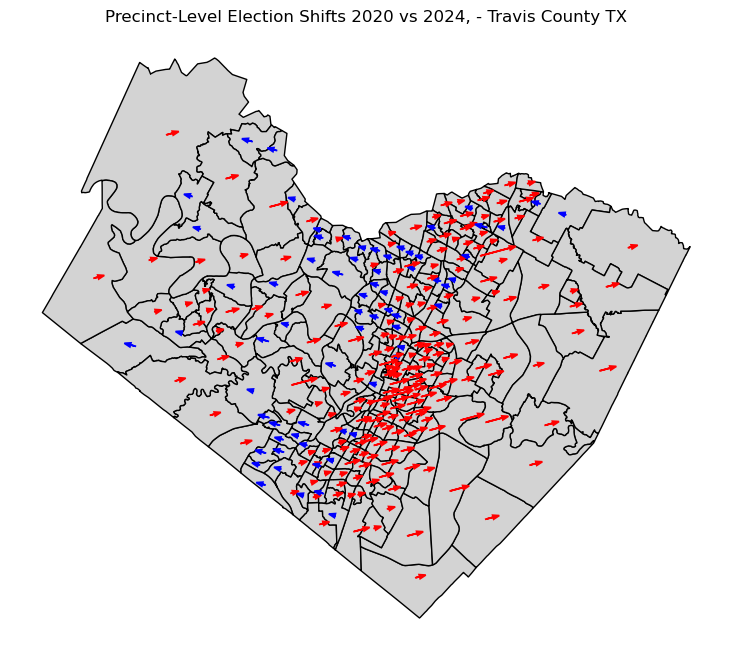

In [46]:
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
shift_data.plot(ax=ax, color='lightgrey', edgecolor='black')  # Base map for counties

for _, row in shift_data.iterrows():
    if pd.notna(row['shift']):  # Check if there's shift data for the county
        # Get county centroid for arrow starting point
        centroid = row['geometry'].centroid
        x, y = centroid.x, centroid.y
        
        # Determine arrow direction and color based on shift
        direction = 'right' if row['shift'] > 0 else 'left'
        color = 'red' if row['shift'] > 0 else 'blue'
        shift_magnitude = abs(row['shift']) * SCALE_FACTOR
        
        # Draw arrow
        dx = shift_magnitude if direction == 'right' else -shift_magnitude
         # setting dy for constant angle
        dy = dx * math.tan(ANGLE/180*math.pi)
        if direction == "left":
            dy = dy * -1
        ax.arrow(x, y, dx, dy, color=color, head_width=0.05*10000, head_length=0.15*5000, linewidth=1.25)

# Final touches
plt.title(f'Precinct-Level Election Shifts {base} vs {compare}, - Travis County TX')
ax.set_axis_off()  # Turn off axis for a cleaner look
plt.savefig(f"{base}_vs_{compare}_tx.png", bbox_inches='tight', dpi=300)
plt.show()
